In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('science')
plt.style.use(['science', 'no-latex', 'ieee'])

In [5]:
figsize = (8, 6)

# Word similarity

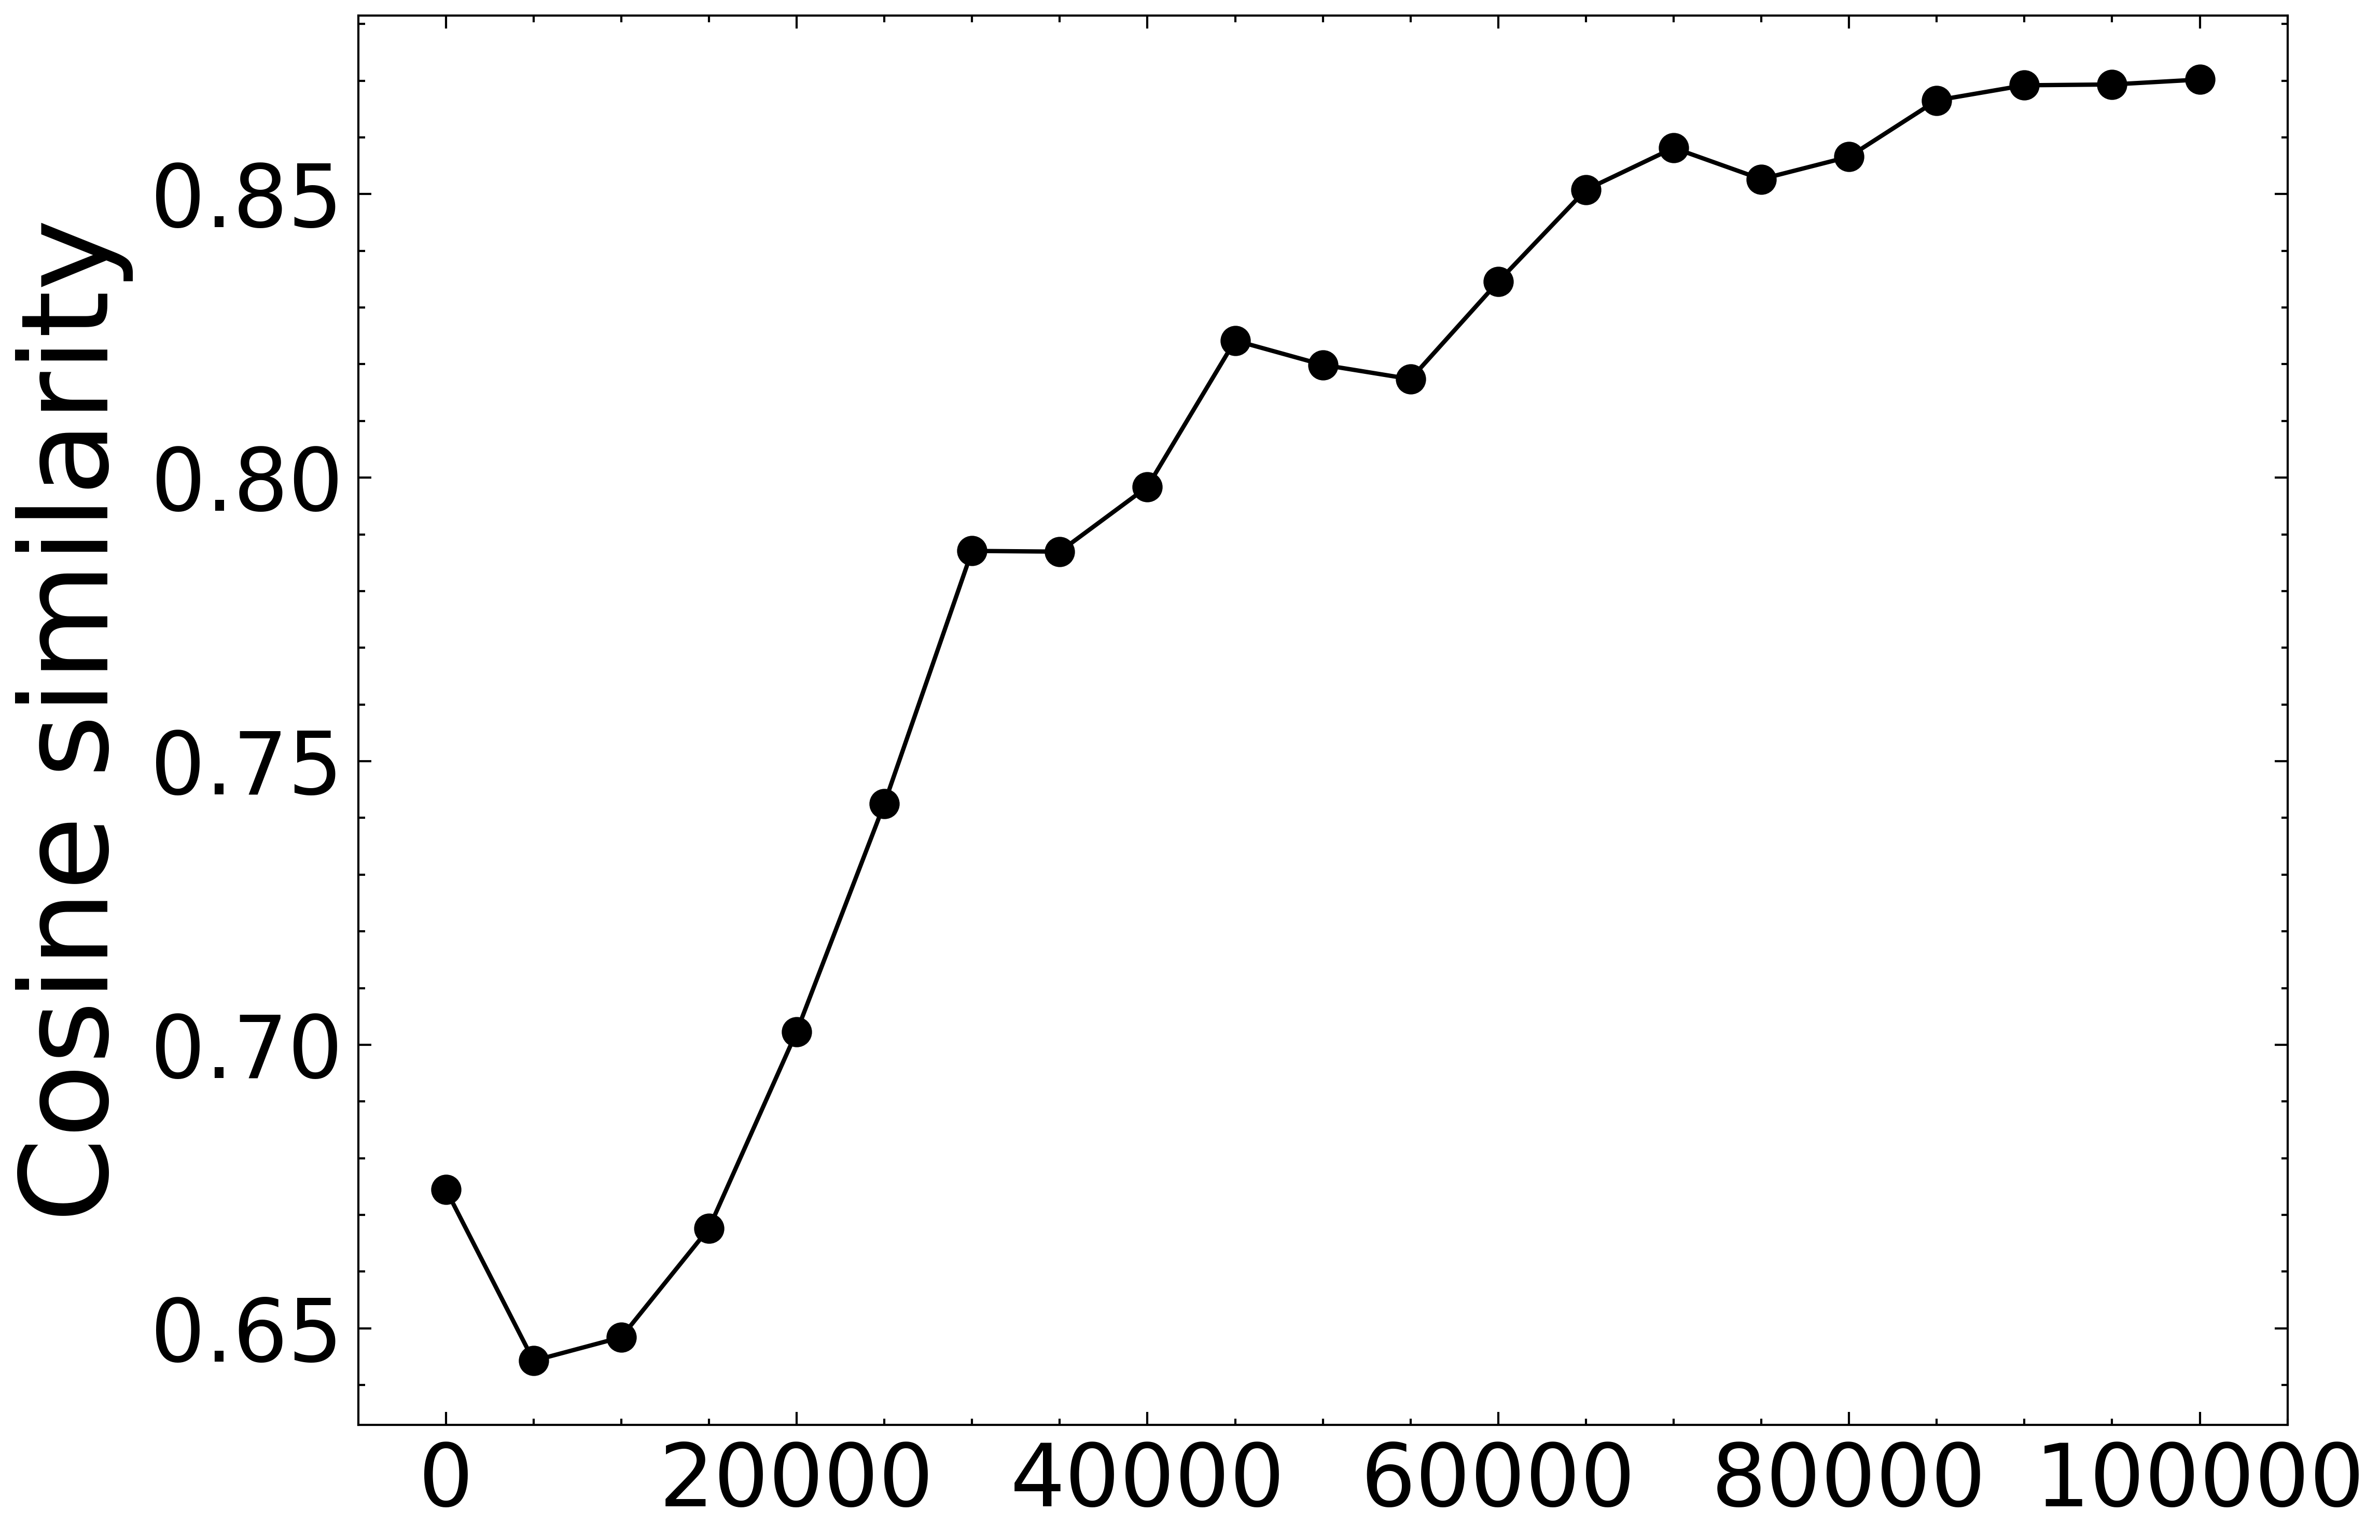

In [31]:
# english finetuning
wordsim_same = pd.read_csv('../results/wordsim/en.sametranslation_wordsim.csv', index_col=0)
wordsim_diff = pd.read_csv('../results/wordsim/en.difftranslation_wordsim.csv', index_col=0)


def draw(wordsim, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    else:
        fig = None
    # # wordsim = wordsim_same['ability_competence']
    # wordsim = wordsim_same['chance_opportunity']
    wordsim.index = [int(name.replace('.pt', '')) for name in wordsim.index]
    ax.plot(wordsim.index, wordsim.values, '-o')
    ax.set_ylabel('Cosine similarity', size=28)
    plt.xticks(fontsize=20);
    plt.yticks(fontsize=20);
    return fig, ax

draw(wordsim_same['chance_opportunity']);


In [32]:
# english-chinese translator finetuning
wordsim_same = pd.read_csv('../results/wordsim/en_zh.sametranslation_wordsim.csv', index_col=0)
wordsim_diff = pd.read_csv('../results/wordsim/en_zh.difftranslation_wordsim.csv', index_col=0)

In [38]:
wordsim - wordsim.iloc[0]

0        0.000000
1000     0.000447
2000     0.000416
3000    -0.003886
4000    -0.003649
5000    -0.005458
6000    -0.006225
7000    -0.007139
8000    -0.007176
9000    -0.006968
10000   -0.007057
Name: ability_competence, dtype: float64

In [43]:
wordsim

0        0.945831
1000     0.946278
2000     0.946247
3000     0.941945
4000     0.942182
5000     0.940373
6000     0.939606
7000     0.938692
8000     0.938655
9000     0.938862
10000    0.938774
Name: ability_competence, dtype: float64

In [48]:
wordsim_same.index

Index(['00000.pt', '01000.pt', '02000.pt', '03000.pt', '04000.pt', '05000.pt',
       '06000.pt', '07000.pt', '08000.pt', '09000.pt', '10000.pt'],
      dtype='object')

In [53]:
wordsim_same['ability_competence']

0        0.945831
1000     0.946278
2000     0.946247
3000     0.941945
4000     0.942182
5000     0.940373
6000     0.939606
7000     0.938692
8000     0.938655
9000     0.938862
10000    0.938774
Name: ability_competence, dtype: float64

Text(0.5, 0, 'Iteration')

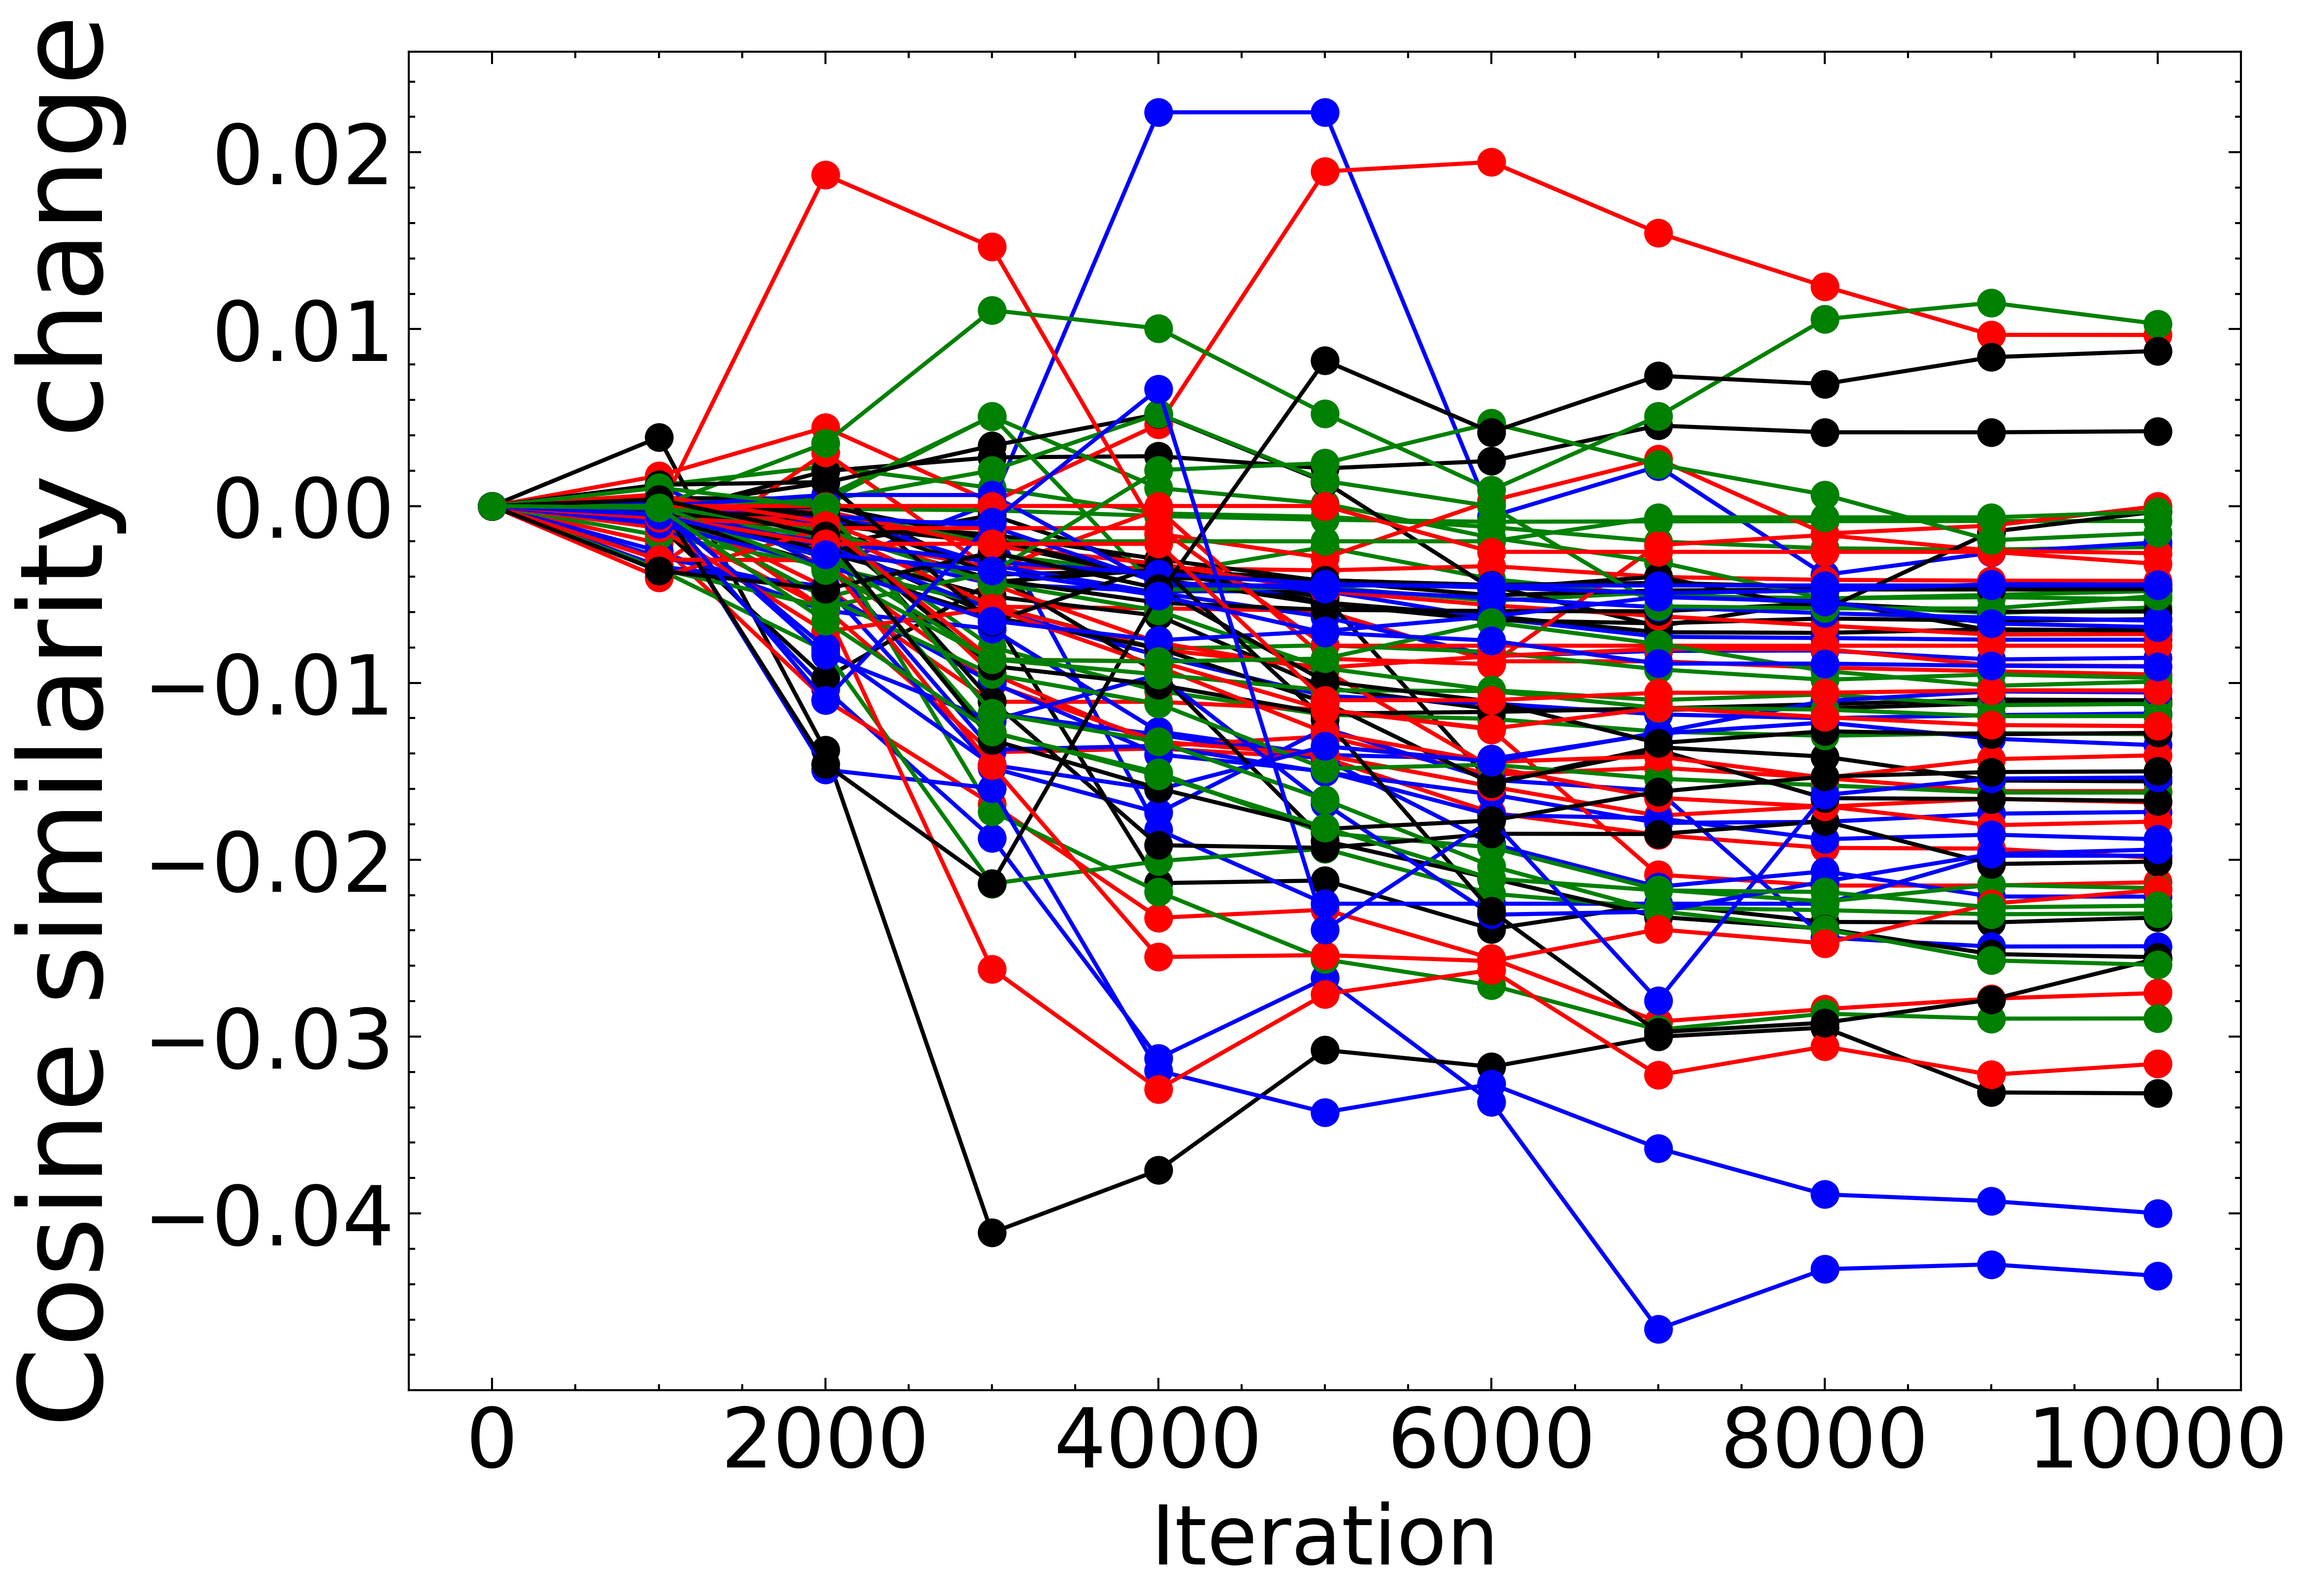

In [58]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
for col in wordsim_same.columns:
    wordsim = pd.Series(index=wordsim_same.index, data=wordsim_same[col].values)
    draw(wordsim - wordsim.iloc[0], ax=ax)
ax.set_ylabel('Cosine similarity change')
ax.set_xlabel('Iteration', fontdict={'size': 20})

Text(0.5, 0, 'Iteration')

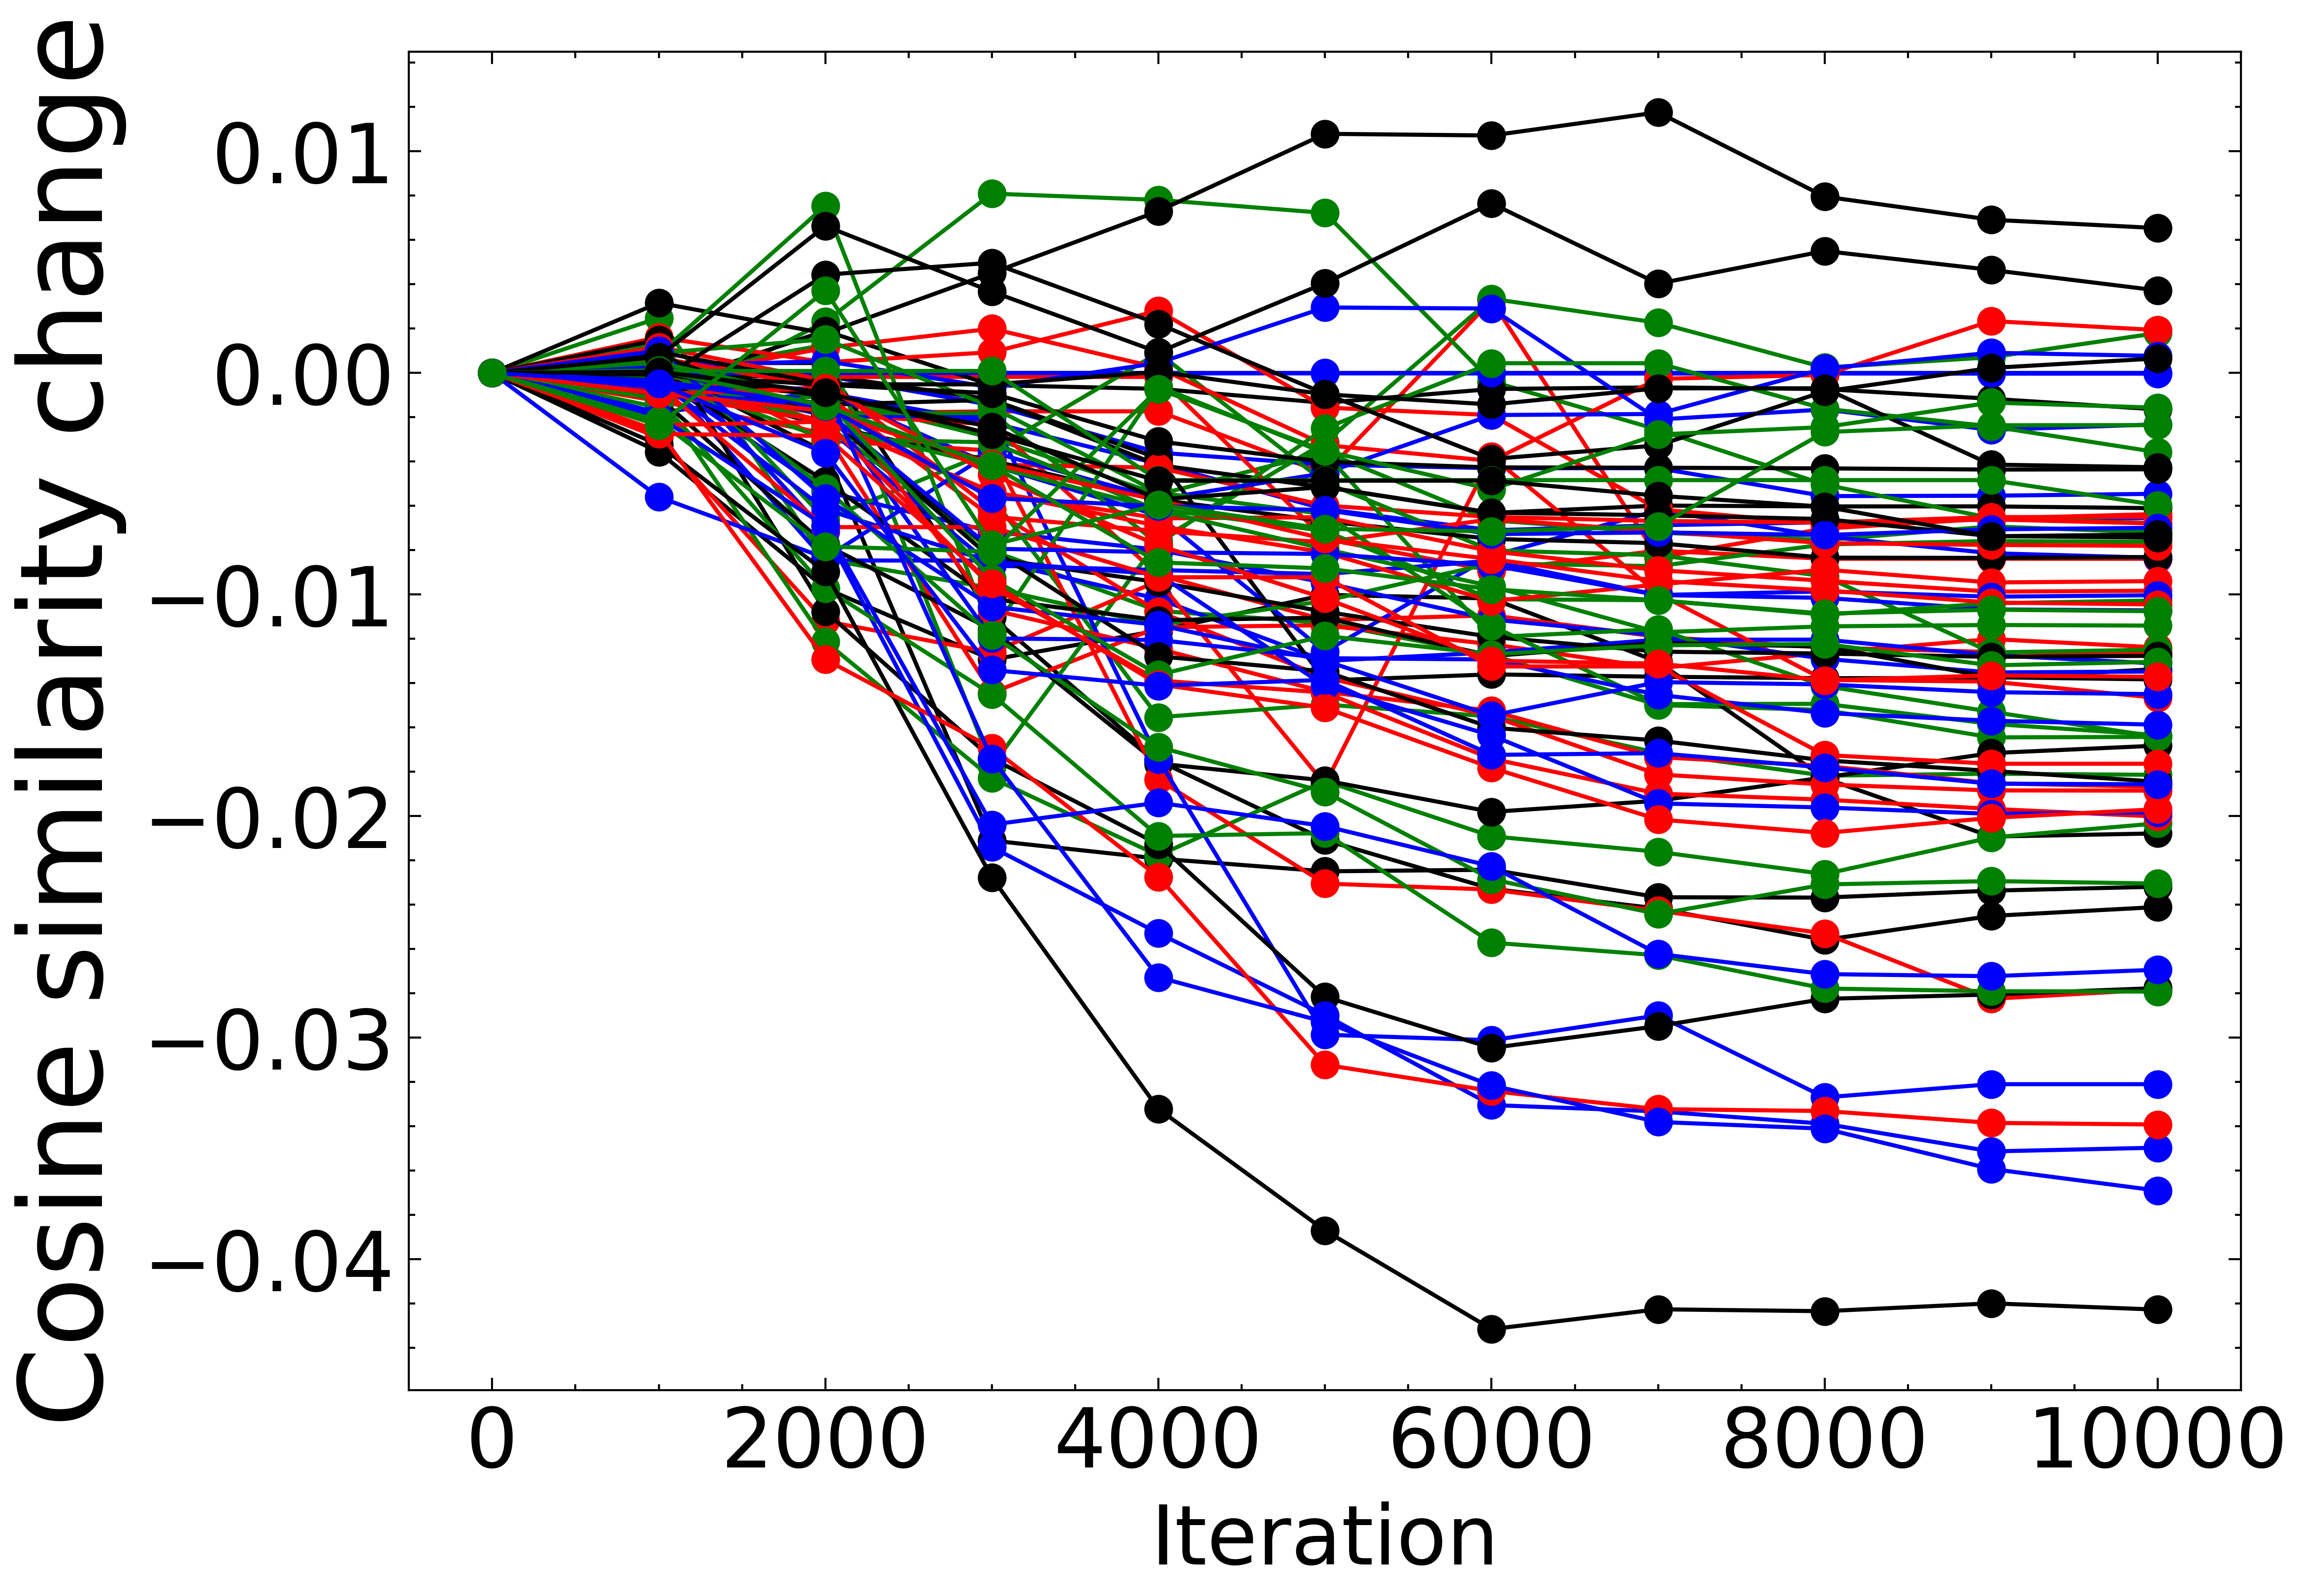

In [60]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
for col in wordsim_diff.columns:
    wordsim = pd.Series(index=wordsim_diff.index, data=wordsim_diff[col].values)
    draw(wordsim - wordsim.iloc[0], ax=ax)
ax.set_ylabel('Cosine similarity change')
ax.set_xlabel('Iteration', fontdict={'size': 20})

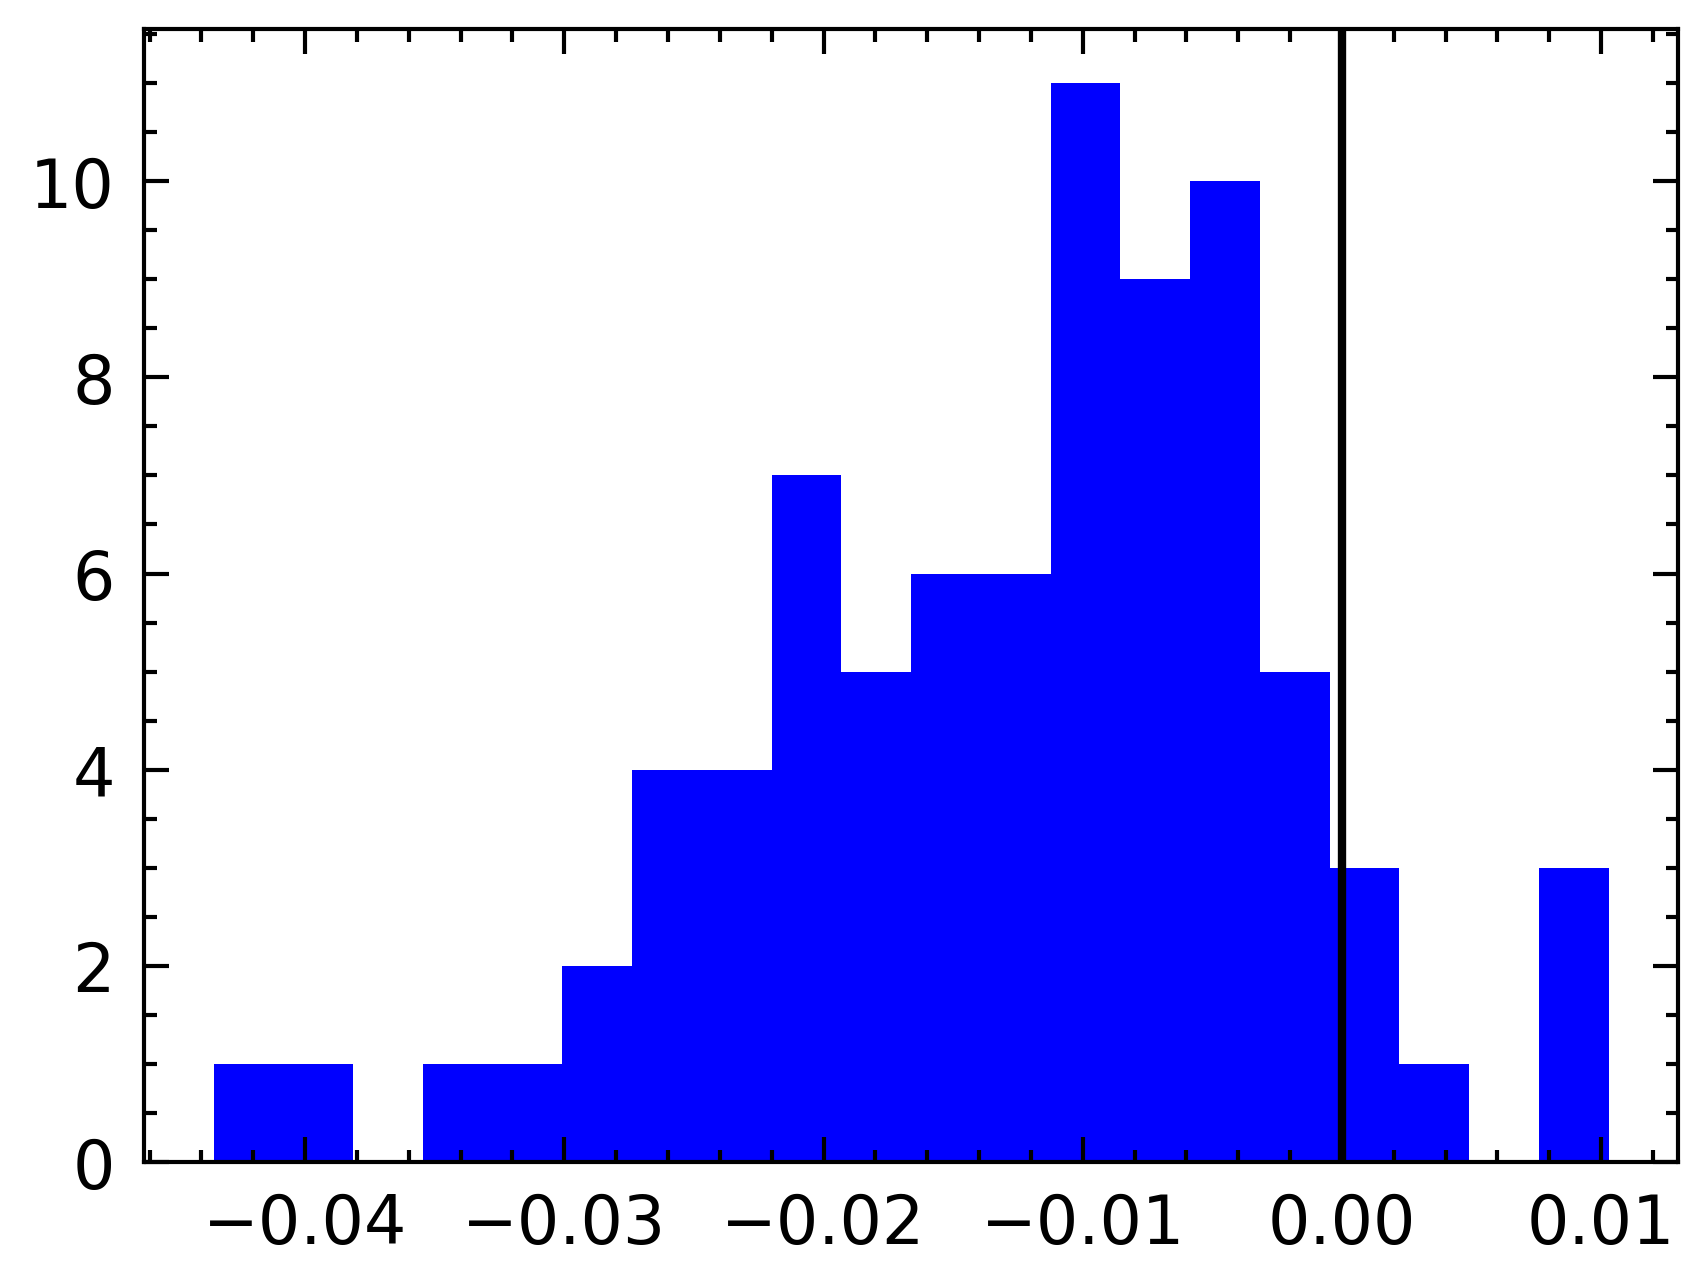

In [69]:
plt.hist(wordsim_same.iloc[-1] - wordsim_same.iloc[0], bins=20, color='blue');
plt.axvline(x=0)

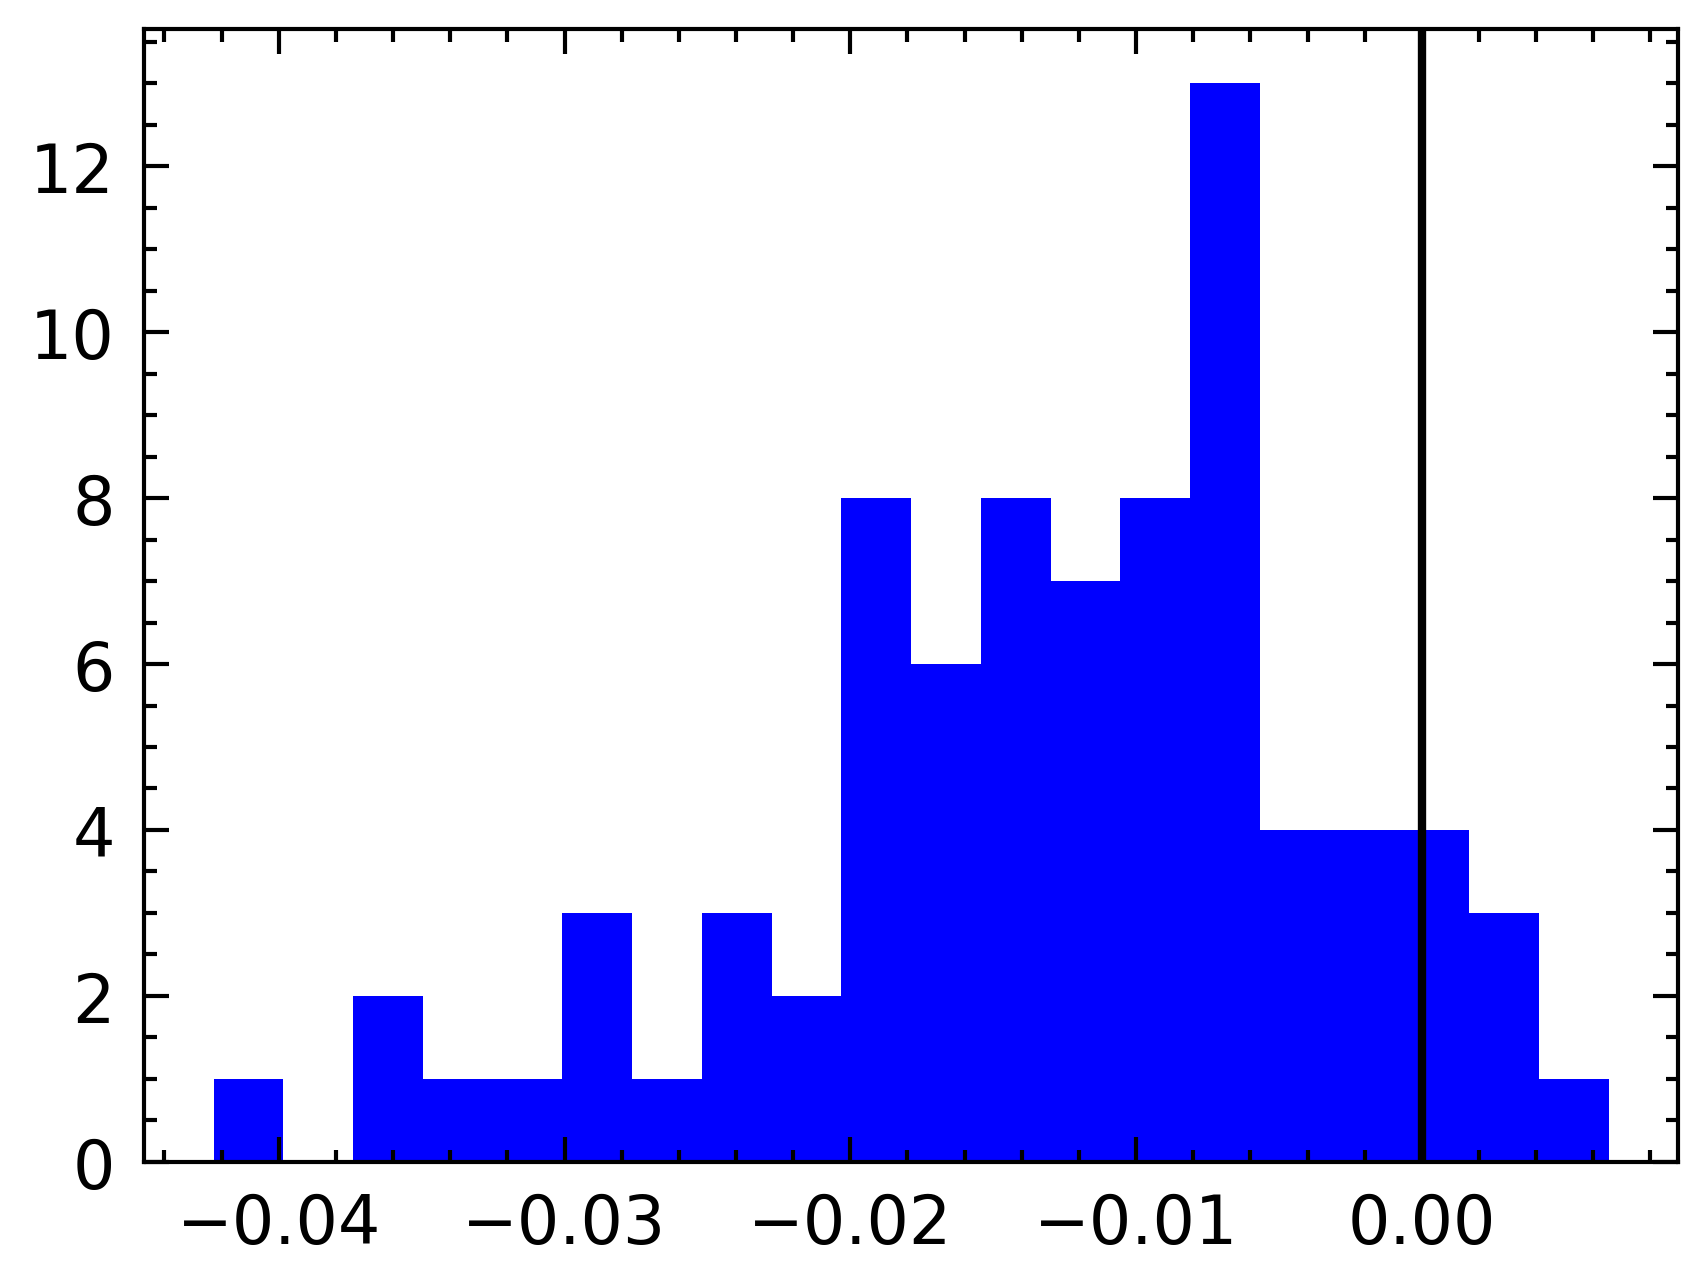

In [70]:
plt.hist(wordsim_diff.iloc[-1] - wordsim_diff.iloc[0], bins=20, color='blue');
plt.axvline(x=0)

Text(0, 0.5, 'Percentage (%)')

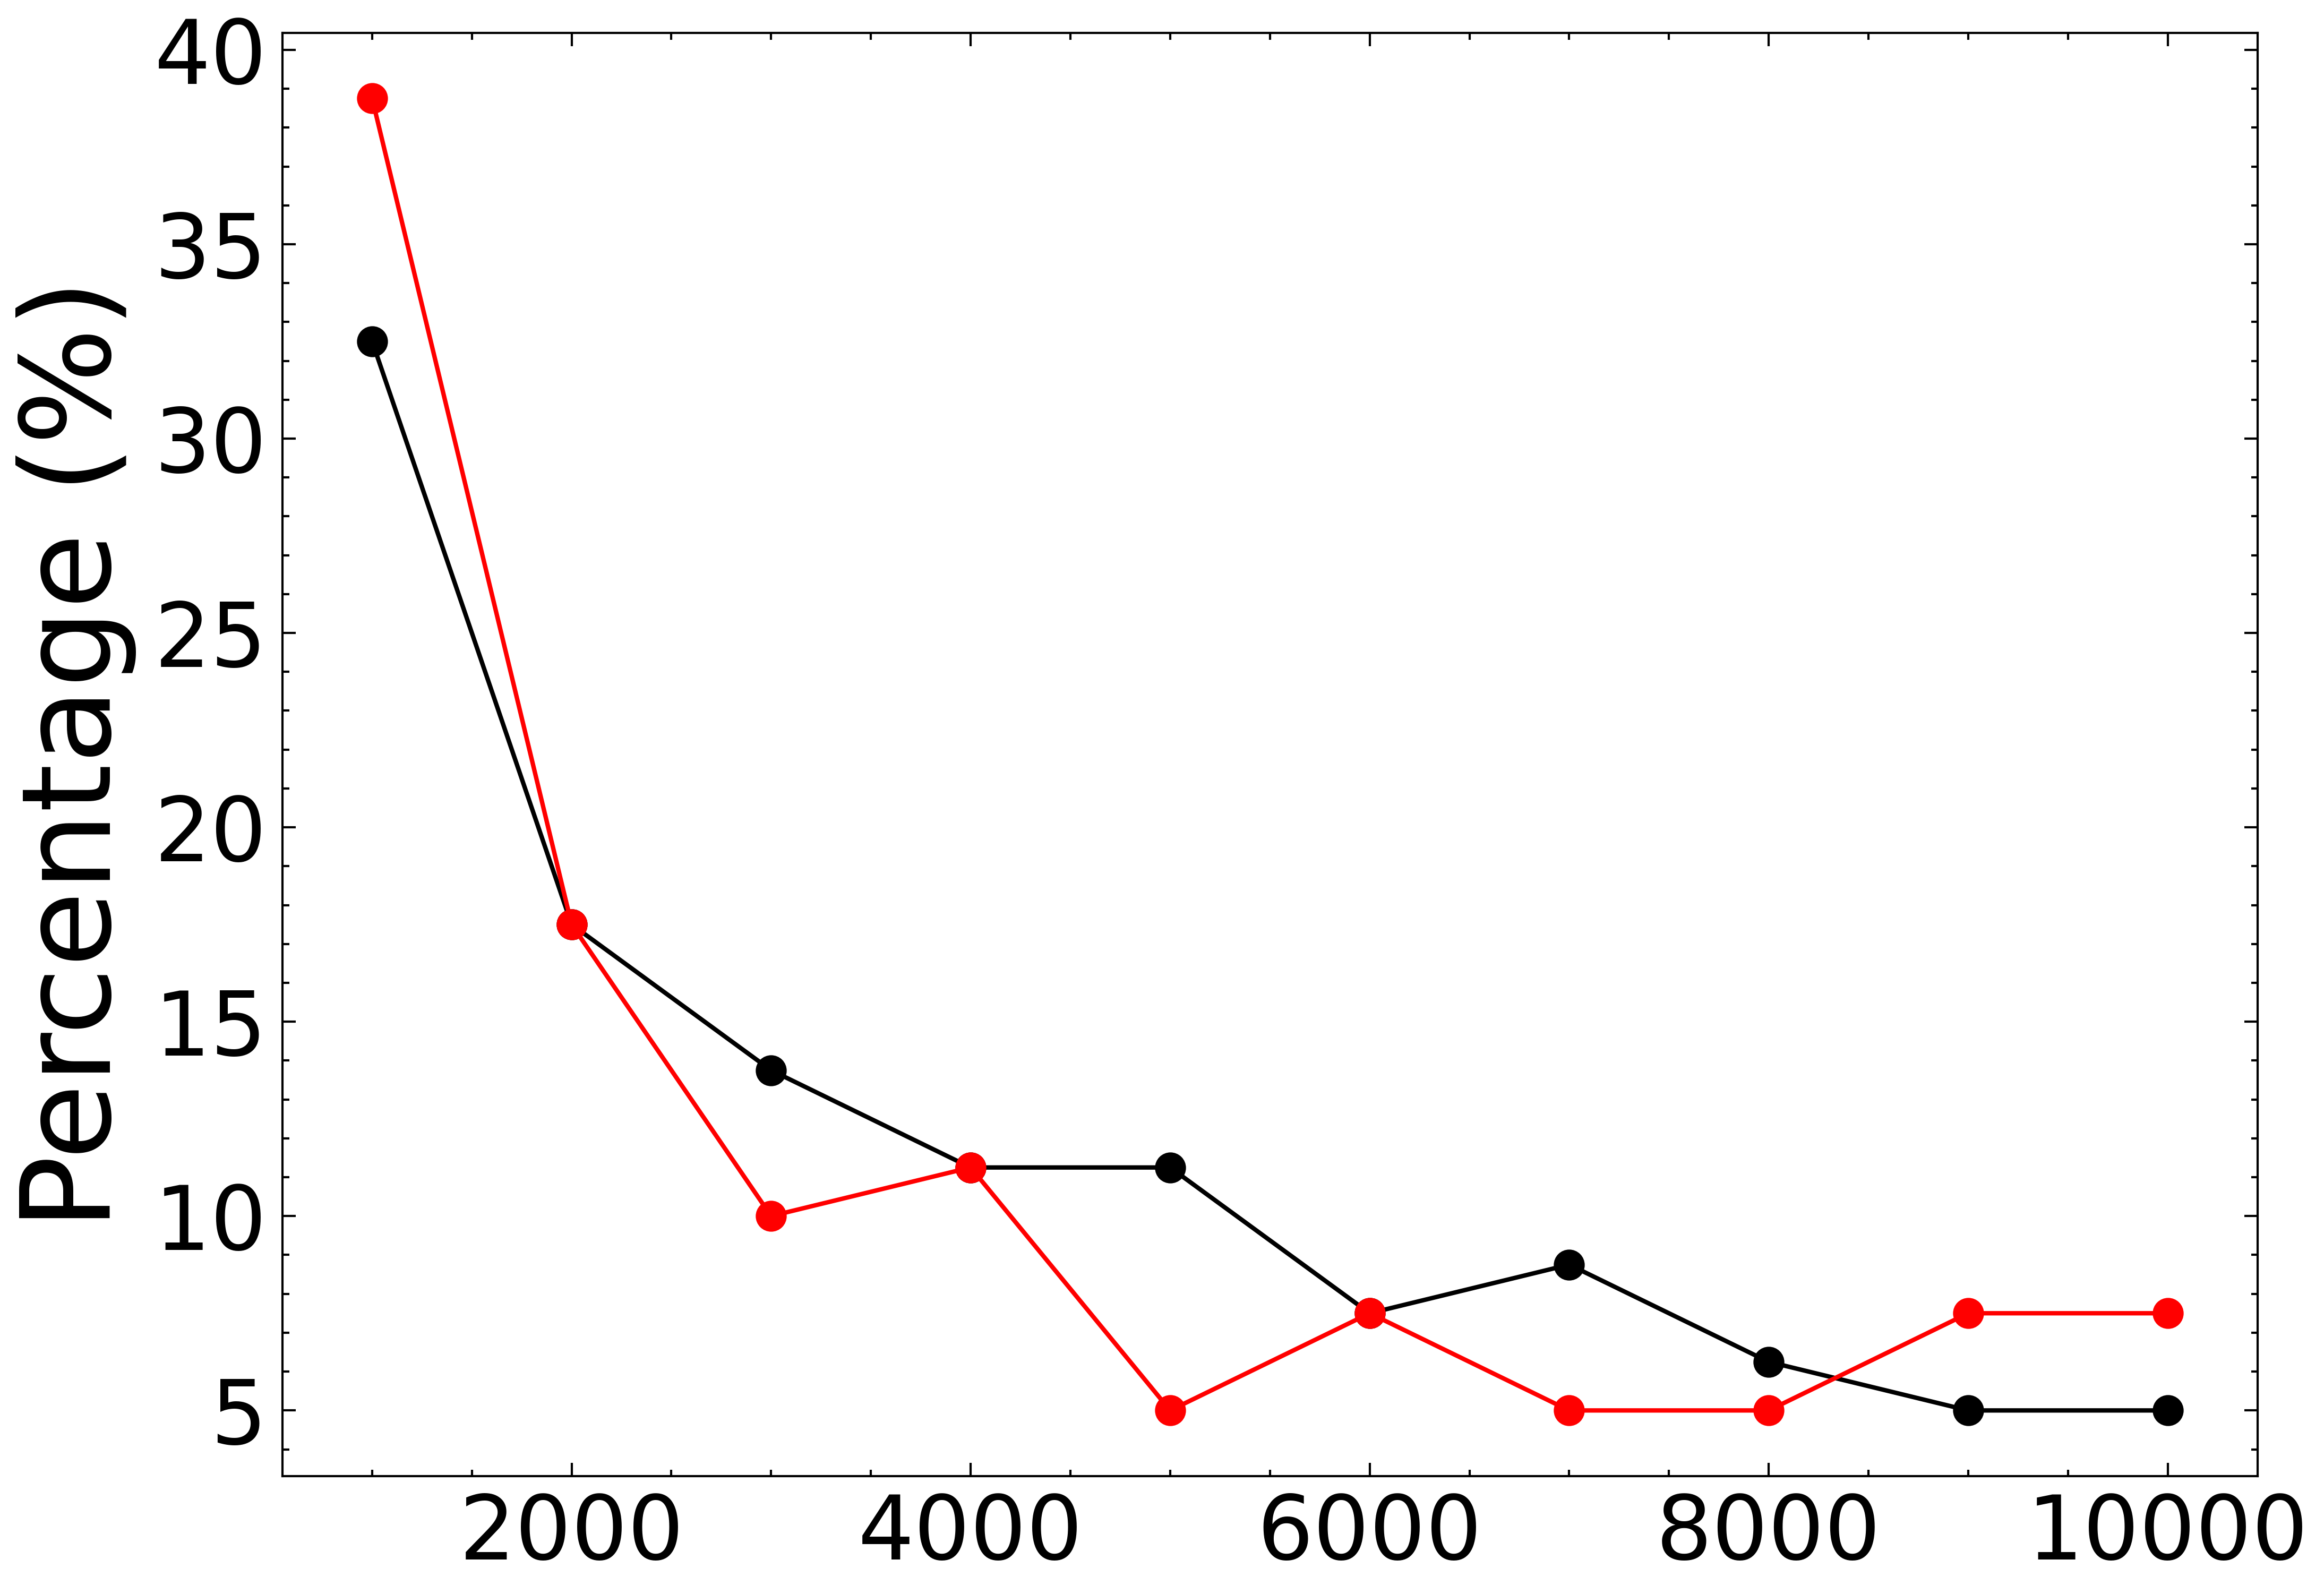

In [82]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
draw((wordsim_same.iloc[1:] > wordsim_same.iloc[0]).mean(axis=1)*100, ax=ax)
draw((wordsim_diff.iloc[1:] > wordsim_diff.iloc[0]).mean(axis=1)*100, ax=ax)
ax.set_ylabel('Percentage (%)')
ax.legend(ax.)